# SeriesBR: A Python package to get brazilian economic time series into a DataFrame

[![Build Status](<https://travis-ci.org/phelipetls/seriesbr.svg?branch=master>)](<https://travis-ci.org/phelipetls/seriesbr>)

## Introduction

This package eases the task of getting data from Banco Central do Brasil
(BCB), Instituto de Pesquisa Econômica Aplicada (Ipea) and Instituto 
Brasileiro de Geografia e Estatística (IBGE) databases.

It has several functions to interact with these databases,
such as searching for a series by name or another criteria,
retrieving metadata and, most importantly,
getting the series values into a \`pandas.DataFrame\`.

It is heavily inspired by the R packages [rbcb](https://github.com/wilsonfreitas/rbcb), [ipeaData](https://github.com/ipea/ipeaData) and [sidrar](https://github.com/cran/sidrar).

## Installation

`pip3 install seriesbr`

## Dependencies

-   requests
-   pandas

## Main Features

-   Get multiple time series with `get_series`.
-   Search in a given database with `search`.
-   Get metadata with `get_metadata`.

## Banco Central do Brasil

Let's imagine you need to get the brazilian interest rate. You
will need a code for that but you have no idea what it is.

Not a problem, you can search for it like this:

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 10)

from seriesbr import bcb

bcb.search("Selic")

,codigo_sgs,title,periodicidade,unidade_medida
0,1178,Taxa de juros - Selic anualizada base 252,diária,Percentual ao ano
1,4390,Taxa de juros - Selic acumulada no mês,mensal,Percentual ao mês
2,4189,Taxa de juros - Selic acumulada no mês anualiz...,mensal,Percentual ao ano
3,4177,Dívida mobiliária - Participação por indexador...,mensal,Percentual
4,10634,Dívida mobiliária federal (saldos) - Posição e...,mensal,Milhões de unidades monetárias correntes
5,,Estatísticas dos Sistemas de Liquidação de Tít...,Mensal,
6,,Negociação de Títulos Federais no Mercado Secu...,,
7,10613,Dívida mobiliária federal - Títulos do Tesouro...,mensal,Meses
8,10614,Dívida mobiliária federal - Títulos do Tesouro...,mensal,Meses
9,10618,Dívida mobiliária federal - Títulos do Tesouro...,mensal,Meses


The `bcb.search` function takes an arbitrary number of optional arguments.

The API then do its best to give the results accordingly.

In [3]:
bcb.search("Atividade", "Econômica", "Índice")

,codigo_sgs,title,periodicidade,unidade_medida
0,24364,Índice de Atividade Econômica do Banco Central...,mensal,Índice
1,7414,Vendas do setor supermercadista (Jan/94=100),mensal,Índice
2,11426,Índice nacional de preços ao consumidor - Ampl...,mensal,Variação percentual mensal
3,11427,Índice nacional de preços ao consumidor - Ampl...,mensal,Variação percentual mensal
4,10841,Índice de Preços ao Consumidor-Amplo (IPCA) - ...,mensal,Variação percentual mensal
5,10842,Índice de Preços ao Consumidor-Amplo (IPCA) - ...,mensal,Variação percentual mensal
6,11428,Índice nacional de preços ao consumidor - Ampl...,mensal,Variação percentual mensal
7,10843,Índice de Preços ao Consumidor-Amplo (IPCA) - ...,mensal,Variação percentual mensal
8,10844,Índice de Preços ao Consumidor-Amplo (IPCA) - ...,mensal,Variação percentual mensal
9,16122,Índice nacional de preços ao consumidor - Ampl...,mensal,Variação percentual mensal


By default, it only returns the first 10 results.
If you didn't find what you're looking for,
you can specify the number of returned results with `rows`
and how many results to skip with `skip`.

In [4]:
bcb.search("Monetária", rows=20, skip=1)

,codigo_sgs,title,periodicidade,unidade_medida
0,17633,Recolhimentos obrigatórios de instituições fin...,mensal,Milhares de unidades monetárias correntes
1,1849,Recolhimentos obrigatórios de instituições fin...,mensal,Milhares de unidades monetárias correntes
2,1848,Recolhimentos obrigatórios de instituições fin...,mensal,Milhares de unidades monetárias correntes
3,1850,Recolhimentos obrigatórios de instituições fin...,mensal,Milhares de unidades monetárias correntes
4,1797,Recolhimentos obrigatórios de instituições fin...,mensal,Milhares de unidades monetárias correntes
...,...,...,...,...
15,10813,Taxa de câmbio - Livre - Dólar americano (compra),diária,Taxa unidade monetária corrente/dólar americano
16,1,Taxa de câmbio - Livre - Dólar americano (vend...,diária,Taxa unidade monetária corrente/dólar americano
17,12150,Saldos das operações de crédito das instituiçõ...,mensal,Milhões de unidades monetárias correntes
18,12106,Saldos das operações de crédito das instituiçõ...,mensal,Milhões de unidades monetárias correntes


Ok, so now you know how to find out the desired code.
Let's get the actual values.

To get just one series, you would simply do:

In [5]:
bcb.get_series({"Spread": 20786}) # or just 20786

,Spread
date,
2011-03-01,26.22
2011-04-01,27.01
2011-05-01,26.84
2011-06-01,26.72
2011-07-01,26.91
...,...
2019-06-01,31.43
2019-07-01,31.63
2019-08-01,31.57


But, in general, you will want to get multiple series.

The most convenient way to do that is to pass a dictionary
with keys being names and values being codes.

You can optionally specify the arguments `start` and `end` for the
initial and final date,  or `last_n` to get
just the last n observations.

In [6]:
bcb.get_series({"Spread": 20786, "Selic": 4189, "PIB_Mensal": 4380}, start="2011", end="07-2012")

,Spread,Selic,PIB_Mensal
date,,,
2011-01-01,NaN,10.85,333330.5
2011-02-01,NaN,11.17,335117.5
2011-03-01,26.22,11.62,348082.9
2011-04-01,27.01,11.74,349255.0
2011-05-01,26.84,11.92,366411.2
...,...,...,...
2012-03-01,27.42,9.82,393868.0
2012-04-01,26.84,9.35,382581.2
2012-05-01,25.20,8.87,401072.7


If you don't mind the columns names, you can just feed it with the numbers.

In [7]:
bcb.get_series(20786, 4189, 4380)

,20786,4189,4380
date,,,
1986-06-01,NaN,18.23,NaN
1986-07-01,NaN,23.51,NaN
1986-08-01,NaN,35.55,NaN
1986-09-01,NaN,39.39,NaN
1986-10-01,NaN,23.65,NaN
...,...,...,...
2019-07-01,31.63,6.40,619395.2
2019-08-01,31.57,5.90,603944.8
2019-09-01,30.84,5.71,566361.6


You can get rid of the NaN's with the argument `join`,
which is passed to the [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function,
as well as any other keyword argument.

The default value for `join` is "outer". So, if you pass "inner":

In [8]:
bcb.get_series(20786, 4189, 4380, join="inner")

,20786,4189,4380
date,,,
2011-03-01,26.22,11.62,348082.9
2011-04-01,27.01,11.74,349255.0
2011-05-01,26.84,11.92,366411.2
2011-06-01,26.72,12.10,371046.4
2011-07-01,26.91,12.25,373333.7
...,...,...,...
2019-06-01,31.43,6.40,594163.0
2019-07-01,31.63,6.40,619395.2
2019-08-01,31.57,5.90,603944.8


Or, of course, you can just call `dropna()` afterwards.

If you want more information about a given series, you can call `get_metadata`
and you will get a dictionary with the results.

In [9]:
metadados = bcb.get_metadata(11)

metadados["notes"]

'Taxa de juros que representa a taxa média ajustada das operações compromissadas com prazo de um dia útil lastreadas com títulos públicos federais custodiados no Sistema Especial de Liquidação e de Custódia (Selic). Divulgação em % a.d.\r\n\r\n__Para mais informações sobre a série, clique no link abaixo:__\r\n\r\nhttps://www3.bcb.gov.br/sgspub/consultarmetadados/consultarMetadadosSeries.do?method=consultarMetadadosSeriesInternet&hdOidSerieSelecionada=11'

## Instituto de Pesquisa Econômica Aplicada

Now let's check what we can do with the IPEA's database.

The `search` function here is more powerful because there are way more filters to play with.

For example, let's filter for a monthly macroeconomic time series with units in percent points.
Here, we have to specify which parameter we are referring to.

Under the hood, this functions asks the API to return any result
containing a given string in the specified field.

In [10]:
from seriesbr import ipea

ipea.search(BASNOME="Macroeconômico", PERNOME="Mensal", UNINOME="(p.p.)")

,SERCODIGO,SERNOME,PERNOME,UNINOME,BASNOME
0,BM12_CRDSD12,Operações de crédito - recursos direcionados -...,Mensal,(p.p.),Macroeconômico
1,BM12_CRDSDPF12,Operações de crédito - recursos direcionados -...,Mensal,(p.p.),Macroeconômico
2,BM12_CRDSDPJ12,Operações de crédito - recursos direcionados -...,Mensal,(p.p.),Macroeconômico
3,BM12_CRLSD12,Operações de crédito - recursos livres - spread,Mensal,(p.p.),Macroeconômico
4,BM12_CRLSDPF12,Operações de crédito - recursos livres - sprea...,Mensal,(p.p.),Macroeconômico
...,...,...,...,...,...
10,VALOR12_GLOBAL2412,Bônus global República (24) - spread,Mensal,(p.p.),Macroeconômico
11,VALOR12_GLOBAL2712,Bônus global República (27) - spread,Mensal,(p.p.),Macroeconômico
12,VALOR12_GLOBAL4012,Bônus global República (40) - spread,Mensal,(p.p.),Macroeconômico
13,VALOR12_GLOBAL912,Bônus global República (9) - spread,Mensal,(p.p.),Macroeconômico


Another example:

In [11]:
ipea.search("Juros", PERNOME="Mensal", UNINOME="(% a.m.)")

,SERCODIGO,SERNOME,PERNOME,UNINOME
0,ANBIMA12_TJCDBP12,Taxa de juros - CDB pré-fixado,Mensal,(% a.m.)
1,BM12_TJCDBN12,Taxa de juros - CDB,Mensal,(% a.m.)
2,BM12_TJCDI12,Taxa de juros - CDI / Over,Mensal,(% a.m.)
3,BM12_TJLCMN12,Taxa de juros - letras de câmbio ao mutuário,Mensal,(% a.m.)
4,BM12_TJLCTN12,Taxa de juros - letras de câmbio ao tomador,Mensal,(% a.m.)
...,...,...,...,...
12,GM12_TJLFT12,Taxa de juros - Letras do Tesouro Nacional - f...,Mensal,(% a.m.)
13,IBMEC12_OTNRTJ12,Taxa de juros - obrigações reajustáveis do Tes...,Mensal,(% a.m.)
14,IBMEC12_TJEMP12,Taxa de juros paga pelo tomador do empréstimo ...,Mensal,(% a.m.)
15,IBMEC12_TJLM12,Taxa de juros - letras imobiliárias,Mensal,(% a.m.)


If you want to filter by theme ("TEMNOME") or by country ("PAINOME"), take a look at what is in
the database with `list_theme` and `list_countries`.

You could then get the series in the very same way:

In [12]:
ipea.get_series({"Taxa de juros - Over / Selic": "BM12_TJOVER12", "Taxa de juros - CDB": "BM12_TJCDBN12"}, join="inner")

,Taxa de juros - Over / Selic,Taxa de juros - CDB
date,,
1974-01-01,1.46,1.800000
1974-02-01,1.15,1.800000
1974-03-01,1.16,1.800000
1974-04-01,1.21,1.800000
1974-05-01,1.24,1.800000
...,...,...
2009-06-01,0.76,0.711593
2009-07-01,0.79,0.776809
2009-08-01,0.69,0.692135


To get metadata you would do the same as in `bcb` module.

In [13]:
metadados = ipea.get_metadata("BM12_TJOVER12")

metadados["SERCOMENTARIO"]

'Quadro: Taxas de juros efetivas.  Para 1974-1979: fonte Andima.  Dados mais recentes atualizados pela Sinopse da Andima.  Obs.: A taxa Overnight / Selic é a média dos juros que o Governo paga aos bancos que lhe emprestaram dinheiro. Refere-se à média do mês. Serve de referência para outras taxas de juros do país. A taxa Selic é a taxa básica de juros da economia.'

## BCB + IPEA

For your convenience there is also a module to get
series from both databases in a single call.

You will always get a `pandas.DataFrame` when calling
`get_series` in every module.

You don't have to worry about converting dates because the index
is already of type `datetime64[ns]` sou you can immediately enjoy
pandas functionalities regarding dates, such as slicing and plotting.

In [14]:
from seriesbr import seriesbr

dados = seriesbr.get_series(
    {
        "spread": 20786,
        "pib_mensal": 4380,
        "igp": "PAN12_IGPDIG12",
        "inadimplência": "BM12_CRLIN12"
    },
    join="inner",
)

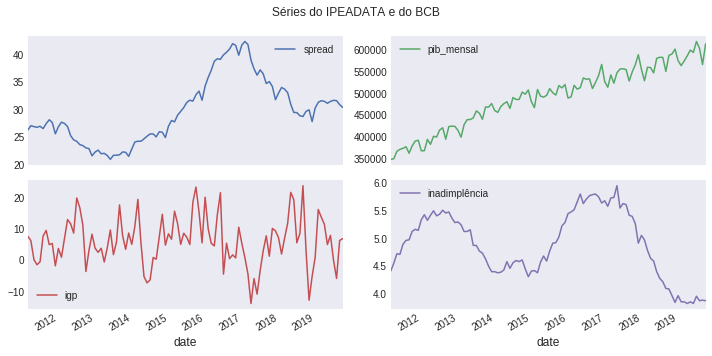

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('seaborn-deep')

dados.plot(subplots=True, layout=(2, 2), figsize=(10, 5))
plt.gcf().tight_layout()
plt.suptitle("Séries do IPEADATA e do BCB")
plt.subplots_adjust(top=.9)

Hope you enjoy the package!!

If you find any bugs or if you think something could be better, 
feel free to open an issue / contribute by opening a pull request!

## Instituto Brasileiro de Geografia e Estatística

IBGE has a very complex database, which allows you to get values for very
specific things. For example, some variables may have different values for
specific locations or categories.

Regarding locations, it could be a city, a state, a macroregion (Sul, Sudeste),
a microregion (for example, Lagos in Rio de Janeiro) or even a mesoregion 
(e.g., Baixadas or Região Metropolitana in Rio).

The variables also has different categories.
For example, the IPCA (Índice de Preços ao Consumidor Amplo) 
has values for very specific products or kinds of products.

If you want such a detailed information, this package may be of help.
It has functions to help you get the codes for all of those things so you
can just pass them to the `get_series` later on.

To get a list of the locations, you can try `list_macroregions`, `list_states`,
 `list_cities`, `list_mesoregion` and `list_microregion`.

To search for an aggregated variable code, you would use `list_aggregates`.
To see which variables are associated with an aggregate, you'd use `list_variables`.

All "list<sub>\*</sub>" functions accepts two optional arguments `search` and `where`, which
is just a convenient way to search for a regex in a given column ("nome" by default).

Also, you can get the metadata of a given aggregate with `get_metadata` function, which
will print a lot of text to the screen depending on the complexity of the aggregate.

To demonstrate how these come together in a typical workflow, let's recreate the first
chart in this [page](https://sidra.ibge.gov.br/home/ipca), a bar plot of the IPCA in October 2019 by products' category.

The aggregate used was "IPCA - Variação mensal, acumulada no ano e acumulada em 12 meses (%)",
let's search for its code.

In [18]:
pd.set_option('max_colwidth', 200)

from seriesbr import ibge

ibge.list_aggregates("IPCA - Variação mensal, acumulada")

,id,nome
2243,2938,"IPCA - Variação mensal, acumulada no ano e peso mensal, para o índice geral, grupos, subgrupos, itens e subitens de produtos e serviços (de julho/2006 até dezembro/2011)"
2244,1419,"IPCA - Variação mensal, acumulada no ano, acumulada em 12 meses e peso mensal, para o índice geral, grupos, subgrupos, itens e subitens de produtos e serviços (a partir de janeiro/2012)"


After some reading, we will conclude that the code we need is 1419.

Let's see the variables of this aggregate.

In [19]:
ibge.list_variables(1419)

,id,variavel,unidade
0,63,IPCA - Variação mensal,%
1,69,IPCA - Variação acumulada no ano,%
2,2265,IPCA - Variação acumulada em 12 meses,%
3,66,IPCA - Peso mensal,%


In the IBGE's chart, they used all of them except for IPCA - Peso mensal.
So, we will need to remember the codes 63, 69 and 66.

Now we need the code for the products categories,
which is a specific classification of this variable.
Let's use `list_classifications`.

I'll use a regex to get the exact categories used in the chart.
This isn't pretty, really, but does work.

In [24]:
df = ibge.list_classifications(1419, "^\d\.(.ndice geral|Alimenta..o e bebidas|Habita.ao|Artigos de resid.ncia|Vestu.rio|Transportes|Sa.de e cuidados pessoais|Despesas pessoais|Educa..o|Comunica..o)$")

df

,id,nome,unidade,nivel,classificacao_id,classificacao_nome
1,7170,1.Alimentação e bebidas,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
227,7486,3.Artigos de residência,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
270,7558,4.Vestuário,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
315,7625,5.Transportes,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
348,7660,6.Saúde e cuidados pessoais,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
395,7712,7.Despesas pessoais,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
428,7766,8.Educação,None,-1,315,"Geral, grupo, subgrupo, item e subitem"
453,7786,9.Comunicação,None,-1,315,"Geral, grupo, subgrupo, item e subitem"


So, now  we have all that we need. Let's make the plot.

In [25]:
ids = df.id.to_list()

ipca = ibge.get_series(1419, variables=[63, 69, 2265], classifications={315: ids})

ipca

,Nível Territorial,Brasil,Mês,Variável,"Geral, grupo, subgrupo, item e subitem",Unidade de Medida,Valor
Data,,,,,,,
2012-01-01,Brasil,Brasil,janeiro 2012,IPCA - Variação mensal,1.Alimentação e bebidas,%,0.86
2012-01-01,Brasil,Brasil,janeiro 2012,IPCA - Variação mensal,3.Artigos de residência,%,0.16
2012-01-01,Brasil,Brasil,janeiro 2012,IPCA - Variação mensal,4.Vestuário,%,0.07
2012-01-01,Brasil,Brasil,janeiro 2012,IPCA - Variação mensal,5.Transportes,%,0.69
2012-01-01,Brasil,Brasil,janeiro 2012,IPCA - Variação mensal,6.Saúde e cuidados pessoais,%,0.30
...,...,...,...,...,...,...,...
2019-10-01,Brasil,Brasil,outubro 2019,IPCA - Variação acumulada em 12 meses,5.Transportes,%,0.40
2019-10-01,Brasil,Brasil,outubro 2019,IPCA - Variação acumulada em 12 meses,6.Saúde e cuidados pessoais,%,4.34
2019-10-01,Brasil,Brasil,outubro 2019,IPCA - Variação acumulada em 12 meses,7.Despesas pessoais,%,3.13


This is what will look like before any manipulation. Let's now do the manipulation needed to the plot.

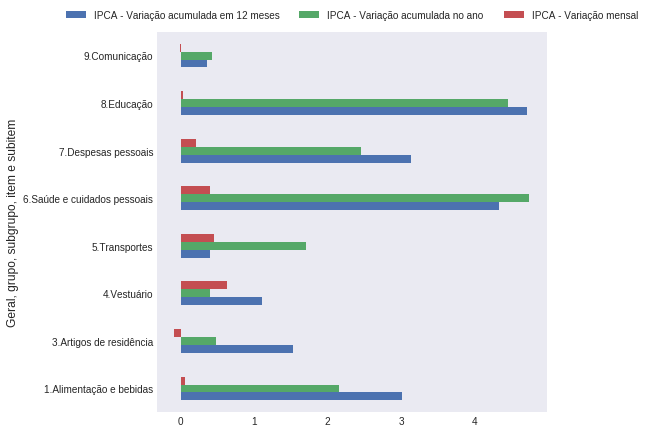

In [33]:
ipca["2019-10"].pivot_table(
    index="Geral, grupo, subgrupo, item e subitem", columns="Variável", values="Valor"
).plot(kind="barh", figsize=(7, 7)).legend(
    loc="upper center", ncol=3, bbox_to_anchor=(0.5, 1.08)
)

## License

[MIT](https://github.com/phelipetls/seriesbr/blob/master/LICENSE)

## Support

If you find it useful, give this repo a start :)